In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
names = pd.read_csv("NationalNames.csv")
names.head(10)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414
8,9,Bertha,1880,F,1320
9,10,Sarah,1880,F,1288


Text(0.5, 1.0, "Ranking of the Name 'Emma'")

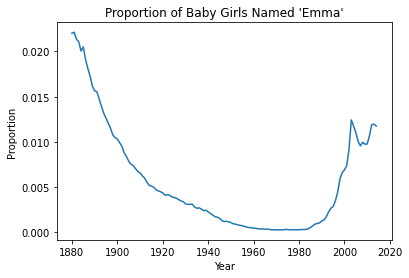

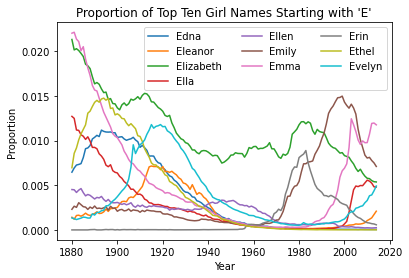

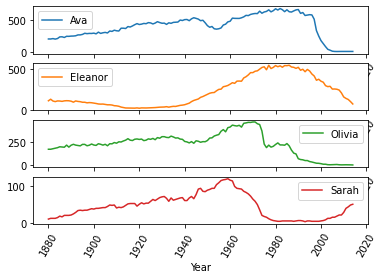

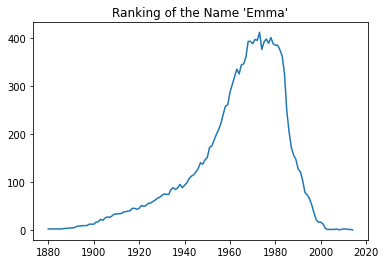

In [4]:
#proportion of girl names (by year) named 'Emma' over time
def prop(group):
    group['Count'] = group['Count'].astype("float")
    prop = group['Count']/group['Count'].sum()
    return prop


names_with_prop = names.groupby(['Year', 'Gender']).apply(prop)
prop = names_with_prop.values.tolist()
names['Prop'] = prop
names_girl = names[names.Gender == 'F']
names_girl_Emma = names_girl[names_girl.Name == 'Emma']
plt.figure()
plt.plot(names_girl_Emma['Year'], names_girl_Emma['Prop'])
plt.title("Proportion of Baby Girls Named 'Emma'")
plt.xlabel("Year")
plt.ylabel("Proportion")


#proportion of top ten girl names (by year) starting with 'E' over time
    
names_girl['First Letter'] = names_girl['Name'].astype(str).str[0]
names_girl_E = names_girl[names_girl['First Letter'] == 'E']
#total births across all years for girl names starting with 'E'
names_girl_E_top = names_girl_E.groupby('Name')['Count'].sum().sort_values(ascending=False)
names_girl_E_top = names_girl_E_top[0:10].index.tolist()
names_girl_E = names_girl_E[names_girl_E.Name.isin(names_girl_E_top)]
names_girl_E = names_girl_E.pivot_table('Prop', index='Year', columns='Name')
names_girl_E['Erin'] = names_girl_E['Erin'].fillna(0.00)
fig, ax = plt.subplots()
names_girl_E.plot(kind='line', ax=ax)
ax.legend(loc='upper right', ncol=3)
ax.set_title("Proportion of Top Ten Girl Names Starting with 'E'")
ax.set_ylabel("Proportion")

#ranking of the name 'Emma' over time

def calculate_rank(births):
    rank = 1
    mydict = {}
    for number in list(reversed(sorted(births))):
        if number not in mydict:
            mydict[number] = rank
            rank = rank + 1
    return [mydict[x] for x in births]

def get_ranks(group):
    grouped = group
    grouped_counts = grouped['Count'].values.tolist()
    grouped_ranks = calculate_rank(grouped_counts)
    grouped['Rank'] = grouped_ranks
    return grouped

#ranking of several girl names over time
names_girl_ranked = names_girl.groupby('Year').apply(get_ranks)
names_girl_ranked_several = names_girl_ranked[names_girl_ranked.Name.isin(['Sarah', 'Olivia', 'Eleanor', 'Ava'])]
#names_girl_ranked_several = names_girl_ranked_several.droplevel(0, axis=0)
names_girl_ranked_several_pivoted = names_girl_ranked_several.pivot_table('Rank', index='Year', columns='Name')
fig, ax = plt.subplots()
names_girl_ranked_several_pivoted.plot(ax=ax, subplots=True, rot=60)
ax.set_title("Rankings of Several Girl Names Over Time")
ax.set_ylabel("Rank")

plt.figure()
names_girl_ranked_Emma = names_girl_ranked[names_girl_ranked.Name == 'Emma']
plt.plot(names_girl_ranked_Emma['Year'], names_girl_ranked_Emma['Rank'])
plt.title("Ranking of the Name 'Emma'")

    
    
    





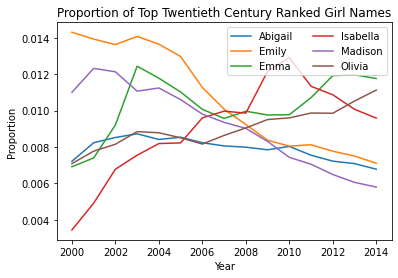

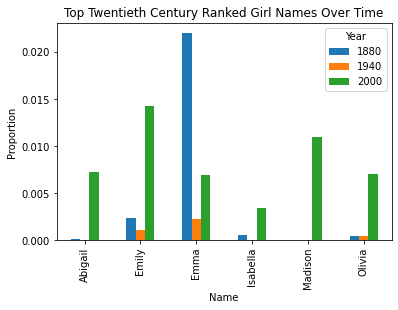

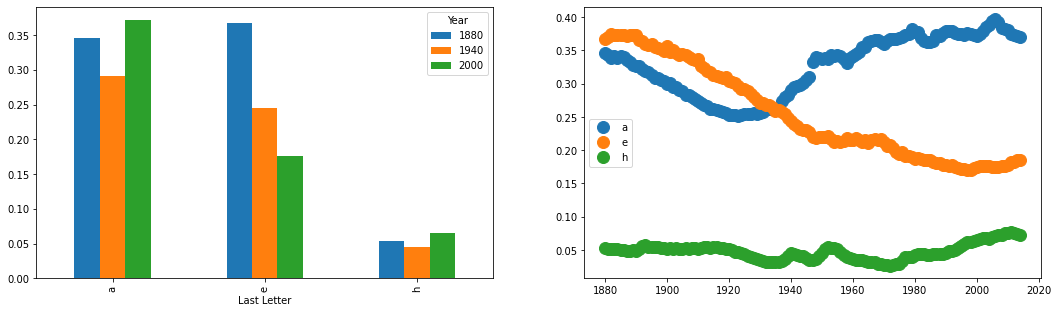

In [5]:
#what girl names, if any, have been ranked in the top ten in the twenty-first century every year?
from IPython.core.display import display, HTML
twentieth_century_years = list(range(2000, 2015))
names_girl_ranked_twentieth = names_girl_ranked[names_girl_ranked.Year.isin(twentieth_century_years)]
#if they are in it every year, the sum of their rankings will be between 15 and 150
names_girl_sum_rankings = names_girl_ranked_twentieth.groupby('Name')['Rank'].sum()
names_girl_sum_rankings = names_girl_sum_rankings.between(15, 150, inclusive=True)
top_names = names_girl_sum_rankings[names_girl_sum_rankings == True].index.tolist()
#what is the proportion of baby girls with these names since 2000?
top_names_girl_twentieth = names_girl_ranked_twentieth.pivot_table("Prop", index='Year', columns='Name')[top_names]
fig, ax = plt.subplots()
top_names_girl_twentieth.plot(kind='line', ax=ax)
ax.legend(loc='upper right', ncol=2)
ax.set_title("Proportion of Top Twentieth Century Ranked Girl Names")
ax.set_ylabel("Proportion")

#how have these top twentieth century names changed before the twenty-first century? 1880, 1940, 2000
names_girl_twentieth = names_girl[names_girl.Name.isin(top_names)]
names_girl_twentieth = names_girl_twentieth[names_girl_twentieth.Year.isin([1880, 1940, 2000])]
names_girl_twentieth_pivoted = names_girl_twentieth.pivot_table('Prop', index='Name', columns='Year')
names_girl_twentieth_pivoted = names_girl_twentieth_pivoted.fillna(0.00)
fig, ax = plt.subplots()
names_girl_twentieth_pivoted.plot(kind='bar', ax=ax)
ax.set_title("Top Twentieth Century Ranked Girl Names Over Time")
ax.set_ylabel("Proportion")

#how has the proportion of girl names ending in 'a', 'e', 'h' changed over time?
names_girl['Last Letter'] = names_girl['Name'].astype(str).str[-1]
names_girl_last_letter = names_girl.pivot_table("Count", index='Last Letter', columns='Year', aggfunc='sum')
names_girl_last_letter = names_girl_last_letter.fillna(0.0)
names_girl_last_letter_sum = names_girl_last_letter.sum(axis=0)
names_girl_last_letter = names_girl_last_letter/names_girl_last_letter_sum
names_girl_last_letter_a_e_h = names_girl_last_letter[names_girl_last_letter.index.isin(['a', 'e', 'h'])]
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
names_girl_last_letter_a_e_h[[1880, 1940, 2000]].plot(kind='bar', ax=axes[0])
names_girl_last_letter_a_e_h = names_girl_last_letter_a_e_h.stack().reset_index()
groups = names_girl_last_letter_a_e_h.groupby('Last Letter')


axes[1].margins(0.05) 
for name, group in groups:
    axes[1].plot(group['Year'], group[0], marker='o', linestyle='', ms=12, label=name)
axes[1].legend()



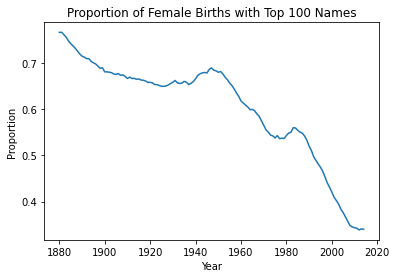

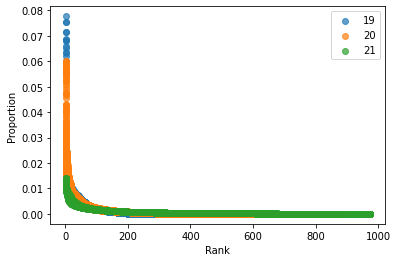

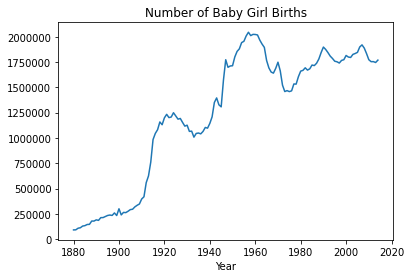

In [11]:
#retrieve the top 100 girl names for each year
def top(group):
    grouped = group.sort_values(by='Count', ascending=False)
    return grouped[0:100]
names_girl_top100 = names_girl.groupby('Year').apply(top)
#by year, what percentage of girl births are the top 100 names?
#retrieve total births per year
total_births_per_year = names_girl.groupby('Year')['Count'].sum().values.tolist()
list_years = list(range(1880, 2015))
#retrieve number of births per year that are the top 100 girl names
names_girl_top100 = names_girl_top100.droplevel(0, axis=0) 
total_births_per_year_100 = names_girl_top100.groupby('Year')['Count'].sum().values.tolist()
proportions = [x / y for x , y in zip(total_births_per_year_100, total_births_per_year)]
frame = pd.DataFrame(dict(Year=list_years, Prop = proportions))
plt.figure()
plt.plot(frame.Year, frame.Prop)
plt.title("Proportion of Female Births with Top 100 Names")
plt.xlabel("Year")
plt.ylabel("Proportion")
#fewer female births are represented by the top 100/year over time - more diversity in female names over time


def centuryFromYear(year):
    return (year) // 100 + 1
names_girl_ranked['Century'] = names_girl_ranked['Year'].apply(centuryFromYear)
#how is rank related to proportion? build a scatterplot of rank vs. proportion, hue by century
groups = names_girl_ranked.groupby('Century')
plt.figure()
for name, group in groups:
    plt.scatter(group['Rank'], group['Prop'], label=name, alpha=0.7)
plt.legend()
plt.xlabel("Rank")
plt.ylabel("Proportion")



#simplest question
#how many female births across all years?
f, ax = plt.subplots()
ax.set_title('Number of Baby Girl Births')
births_across_years = names_girl.groupby('Year')['Count'].sum().plot(kind='line', ax=ax)
ax.ticklabel_format(style='plain')

